<a href="https://colab.research.google.com/github/msmsd778/k-nearest-neighbors/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-learn==0.23.1

     |████████████████████████████████| 6.8 MB 18.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [5]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2021-08-05 09:27:00--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  35.20K  --.-KB/s    in 0.001s  

2021-08-05 09:27:00 (30.0 MB/s) - ‘teleCust1000t.csv’ saved [36047/36047]



# Load Data From CSV File

In [6]:
df = pd.read_csv("teleCust1000t.csv")
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


# Data Visualization and Analysis

In [7]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4165e2ddd0>]],
      dtype=object)

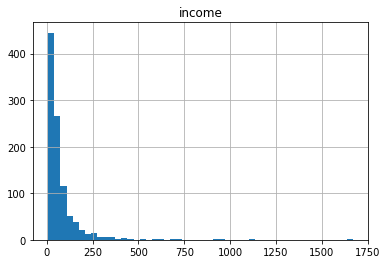

In [12]:
df.hist(column='income', bins=50)

In [13]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [15]:
x = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [16]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

# Normalize Data

In [17]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print('Train set:', x_train.shape, y_train.shape)
print('Test set:' , x_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# Classification
<br>

# K nearest neighbor (KNN)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Training

In [28]:
k = 4

neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

# Predicting

In [31]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

# Accuracy evaluation

In [32]:
from sklearn import metrics
print('Train set accuracy: ', metrics.accuracy_score(y_train, neigh.predict(x_train)))
print('Test set accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set accuracy:  0.5475
Test set accuracy:  0.32


This time with k=6

In [34]:
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
yhat = neigh.predict(x_test)
print('Train set accuracy: ', metrics.accuracy_score(y_train, neigh.predict(x_train)))
print('Test set accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set accuracy:  0.51625
Test set accuracy:  0.31


## What is the right K?

In [38]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range (1,Ks):
  neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
  yhat = neigh.predict(x_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
  std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

### Plot the model accuracy for a different number of neighbors.

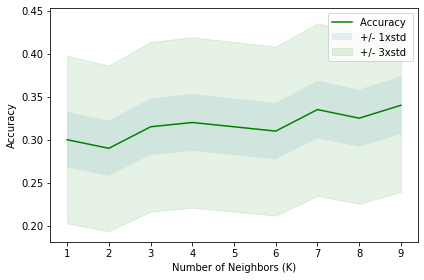

In [39]:
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color="green")
plt.legend(('Accuracy ', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [42]:
print("The best accuracy was with", mean_acc.max(), "with k = ", mean_acc.argmax() + 1)

The best accuracy was with 0.34 with k =  9
